# GroupWork
講座で学んだ知識を活かし「モデル精度」に関する以下２つのストーリーの考察を行いましょう。本ファイル掲載の時間は目安ですので、当日の講師の指示に従ってください。
- GroupWork-1：精度95%の根拠の図を考察する（目安時間：50分）
- GroupWork-2：精度90%の混同行列系指標を考察する（目安時間：60分）

# GroupWork-1

1. 【目安:5分】<br>まずは各自、以下の「ビジネス背景」と「ステムさんによる説明」を読みましょう。
1. 【目安:15分】<br>概要を掴んだら各自、この「精度95%」を批判的に考察してみましょう。
1. 【目安:20分】<br>グループを構成し、各自の考察結果を共有した上で、グループの総評をまとめましょう。
1. 【目安:10分】<br>講師による解説

### ビジネス背景
```
全国で複数のコールセンターを運営するコール株式会社。現在、オペレーター求人への応募数自体は安定的に推移しているのですが、その定着率はとても低く、今後は応募数自体の減少が見込まれています。そこで、AI開発ベンダーのAI technologyに依頼し、3か月後のオペレーターの退職確率を予測してもらうことにしました。
 
コール株式会社の期待は、退職を事前に検知しその防止を図ること。AI technologyが必要とするデータを社内から何とか集め、AI technology社へ提供してから1カ月半が経過。ついにプロジェクト進捗状況の中間報告を受ける日がやってきました。
 
中間報告が始まり報告資料が配布されると、最初のページ「ご報告サマリー」から、次のような記述が目に飛び込んできました。
```

> <b>退職予測精度は95%を実現見込み</b>

```
ピープルアナリティクス業界では90%以上の精度が要求されると、偉い人が何となく言っていたことを何となく聞いた記憶のあるコール株式会社のプロジェクト責任者のキリトリさんは、いきなり、95%を実現できるとは思ってもいませんでした。社内に説明する責任のあるキリトリさん。精度95%をどのように算出したのか、AI technologyの担当データサイエンティストのステムさんに説明を求めました。
```

### ステムさんによる説明
    ステムさんによると精度95%を示すチャートは以下であるとのことです。これとは別に以下説明を受けましたが、キリトリさんにはあまり理解できませんでした。しかし、最後のチャートはそのまま社内説明に使いたいと考え、この図の理解に集中することとしました。
    
    ＜ステムさんが説明した検証条件概要＞
    - 機械学習のモデリングでは過学習回避が重要であること
    - モデル用データにおける交差検証にて最良モデルを得たこと
    - モデル用データとは別の検証用データを別途準備し以下の図を得たこと

    ＜ステムさんが示した精度95%の根拠＞
<img src="./images/gw1-1.JPG" width='500'>
source:http://www.itmedia.co.jp/enterprise/articles/1809/05/news001.html <br>
※ビジネス背景などは、モデル評価図とは関係のない架空のストーリーです。

## 講師解説

### GW1-1. 予測スコアの序列整合はあるが、スコアと実際確率に乖離がある場合
検証サンプルを退職確率の昇順に並べ、各区分のサンプル数が等しくなるようにスコアを10分割した時、以下のように集計されたと仮定しましょう。
- 予測スコアの平均：`mean_predict`の配列を参照
- 実際の退職確率：`positive_fraction`の配列を参照

R2値:0.875


C:\Users\norik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


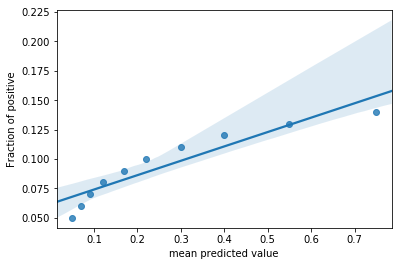

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mean_predict = [0.05,0.07,0.09,0.12,0.17,0.22,0.30,0.40,0.55,0.75]
positive_fraction = [0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14]
data = {'mean predicted value' : mean_predict, 'Fraction of positive' : positive_fraction}

print('R2値:%.3f' % np.corrcoef(positive_fraction, mean_predict)[0,1]**2)
sns.regplot('mean predicted value', 'Fraction of positive', pd.DataFrame(data=data))
plt.show()

上のように、最上位ランクでは予測スコア平均は75%ですが、実際は14%しか退職していません。それでもステムさんは、R2値を根拠に精度87.5%と主張するのでしょうか？

### GW1-2. 予測スコアの序列整合自体が崩れている場合
検証サンプルを退職確率の昇順に並べ、各区分のサンプル数が等しくなるようにスコアを10分割した時、以下のように集計されたと仮定しましょう。

R2値:0.875


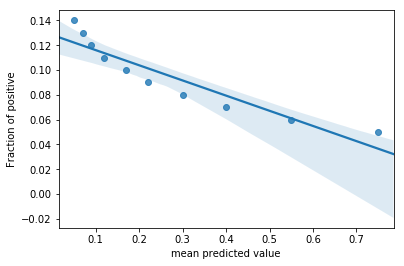

In [2]:
mean_predict = [0.05,0.07,0.09,0.12,0.17,0.22,0.30,0.40,0.55,0.75]
positive_fraction = [0.14,0.13,0.12,0.11,0.10,0.09,0.08,0.07,0.06,0.05]
data = {'mean predicted value' : mean_predict, 'Fraction of positive' : positive_fraction}

print('R2値:%.3f' % np.corrcoef(positive_fraction, mean_predict)[0,1]**2)
sns.regplot('mean predicted value', 'Fraction of positive', pd.DataFrame(data=data))
plt.show()

上のように、予測スコアが上がるほど実際退職確率が低下しているケースでもR2値は0.875です。それでもステムさんは、精度87.5%と主張するのでしょうか？

# GroupWork-2

1. 【目安:5分】<br>まずは各自、以下の「ビジネス背景」と「ステムさんからの質問とキリトリさんの回答」を読みましょう。
1. 【目安:25分】<br>概要を掴んだら各自、この「精度90%」を批判的に考察してみましょう。
1. 【目安:20分】<br>グループを構成し、各自の考察結果を共有した上で、グループの意見をまとめましょう。
1. 【目安:10分】<br>講師による解説

### ビジネス背景
```
広告運用を手掛けるアドバ株式会社。広告パフォーマンス予測や、広告予算の最適化などにおいて機械学習技術の活用を進めてきました。社内のデータサイエンスチームはこれら技術を、社内の管理部門においても応用したいと考えました。

コール株式会社での実績を買われ、人事部長として転職してきたキリトリさん。データサイエンスチームが管理業務の効率化を模索していると聞き、過去に経験のある、退職予測モデルから一緒に取り組むことにしました。キリトリさんは、勤怠情報や社員の配属履歴データをデータサイエンスチームに提供し、退職予測の初期モデル構築と精度検証の初回報告を待つことにしました。

データサイエンスチームでは、分析人材育成の目的も兼ね、新人のデルファイさんを本プロジェクトにアサインしました。デルファイさんは初回報告で以下のようなモデル評価をキリトリさんに伝えました。

```

> <li><b>モデルの予測精度は90%程度の見通し</b></li>
> <li><b>精度90%は正解率（Accuracy）ベースであること</b></li>
> <li><b>再現率（Recall）ベースでは60%であること</b></li>

```
キリトリさんはコール株式会社の時代に、R2スコアベースで精度95%を実現していたので、その指標で再提出して欲しいとデルファイさんに頼みましたが、デルファイさんに固辞されてしまい、仕方なく前職でお世話になったAI technologyのステムさんに、このモデル評価は妥当かを質問することにしました。
```

### ステムさんからの質問とキリトリさんの回答
    キリトリさんから質問を受けたステムさん。キリトリさんへ、以下のような質問を投げましたが、追加の情報は得られませんでした。
    
    ＜ステムさんからキリトリさんへの質問とキリトリさんの回答＞
    1. 【質問】正解率と再現率以外に、適合率について報告を受けたか？
      --> 【回答】適合率について報告を受けていない。
    2. 【質問】検証データにおける、正例と負例のサンプル数はわかるか？
      --> 【回答】正例と負例のサンプル数はわからないが、負例の方が多いはずである。

    ちょっと困ったステムさんですが、広く仮定をおいて回答を準備をすることにしました。

## 講師解説
以下、混同行列の略称を用います。

|Actual|Predict<br>Positive|Predict<br>Negative|
|:--|:--:|:--:|
|Positive |TP<br>(True Positve)  | FN<br>(False Negative)|
|Negative |FP<br>(False Positive)| TN<br>(True Negative)    |

### GW2-1. 退職率が5%、検証期間中の退職者数が25人の場合
- 再現率が60%なので、TPはFNの1.5倍、仮にTP=15人とするとFN=10人です。
- 正解率が90％なので、TP+TNはFP+FNの9倍です。
- 仮に実際退職率を5%とすると、TP+FN=25人に対してFPとTNはそれぞれ40人と435人と計算できます。
- 以上を混同行列でまとめると以下のようになります。

|Actual|Predict<br>Positive|Predict<br>Negative|TTL|
|:--|:--:|:--:|:--:|
|Positive |TP=15|FN=10|25|
|Negative |FP=40|TN=435|475|
|TTL|55|445|500|

- 正解率は450/500=90%、再現率は15/25=60%です。

この場合、退職と予測された55人のうち、実際退職者数は15人ですから、適合率は約27%(=15/55)です（精度90%と言いつつ73%を外しています）。不均衡データにおいては、モデルの使途を考えても適合率の報告がないのは不自然に感じます。ただしモデルそのものの性能は、全体退職率が5%ですから、Positve予測時のアップリフトは5.4倍(=27/5)と、かなり妥当な精度水準に思えます。精度指標はわかりやすさよりも、モデルの使途から考えるべきでしょう。

### GW2-2. 退職率が20%、検証期間中の退職者数が25人の場合
結果の混同行列のみを示すと、以下のようになります。

|Actual|Predict<br>Positive|Predict<br>Negative|TTL|
|:--|:--:|:--:|:--:|
|Positive |TP=15|FN=10|25|
|Negative |FP=2|TN=98|100|
|TTL|17|108|125|

この場合、再現率は60%(=15/25)、正解率=113/125=90.4%で、適合率は88%(=15/17)となります。アップリフトも4.4倍と悪くありません。この場合、適合率は、正解率と再現率に近い数値ですが、先の仮定と比べて数値が大きく動くため、やはり本指標の報告は欠かせないように思えます。どのようにモデルを評価するか事前合意の上、モデルの性能についてコミュニケーションを図るべきでしょう。